Pratinav Seth 200968216

In [70]:
import gym
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Q1. Taxi Enviroment

In [71]:
env = gym.make("Taxi-v3")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# Q2. On-Policy First-Visit MC 

In [72]:
num_episodes = 500
gamma = 0.9
epsilon = 0.1
num_actions = env.action_space.n
num_states = env.observation_space.n

In [73]:
Q_on_policy = np.zeros((num_states, num_actions))
returns_sum_on_policy = np.zeros((num_states, num_actions))
returns_count_on_policy = np.zeros((num_states, num_actions))

In [74]:
def epsilon_soft_policy(state, Q, epsilon):
    policy = np.ones(num_actions, dtype=float) * epsilon / num_actions
    best_action = np.argmax(Q[state])
    policy[best_action] += (1.0 - epsilon)
    return policy

In [75]:
mc_rewards=[]
mc_ep_length=[]
for i_episode in range(num_episodes):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    state = env.reset()
    done = False
    
    while not done:
        policy = epsilon_soft_policy(state, Q_on_policy, epsilon)
        action = np.random.choice(num_actions, p=policy)
        next_state, reward, done, info = env.step(action)
        episode_states.append(state)
        episode_actions.append(action)
        episode_rewards.append(reward)
        state = next_state
    
    mc_rewards.append(sum(episode_rewards))
    mc_ep_length.append(len(episode_rewards))
    discounts = gamma ** np.arange(len(episode_rewards) + 1)
    returns = np.cumsum(episode_rewards[::-1])[::-1] * discounts[:-1]
    for t in range(len(episode_states)):
        state = episode_states[t]
        action = episode_actions[t]
        returns_sum_on_policy[state][action] += returns[t]
        returns_count_on_policy[state][action] += 1
        Q_on_policy[state][action] = returns_sum_on_policy[state][action] / returns_count_on_policy[state][action]
     

In [95]:
print("\nOptimal Policy using on-policy first-visit MC control:\n", np.argmax(Q_on_policy, axis=0))


Optimal Policy using on-policy first-visit MC control:
 [  0   0 418 499   0 418]


# Q3. SARSA Method

In [77]:
alpha = 0.4
gamma = 0.9
epsilon = 0.9
n_episodes = 500 

In [78]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))

In [79]:
def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state])
    return action

def update_sarsa(state, action, reward, next_state, next_action):
    td_error = reward + gamma * q_table[next_state][next_action] - q_table[state][action]
    q_table[state][action] += alpha * td_error

In [87]:
sarsa_rewards = []
sarsa_count = []
for i in range(n_episodes):
    len_t = 0
    state = env.reset()
    action = choose_action(state)
    total_reward = 0
    done = False
    while not done:
        next_state, reward, done, info = env.step(action)
        next_action = choose_action(next_state)
        update_sarsa(state, action, reward, next_state, next_action)
        state = next_state
        action = next_action
        total_reward += reward
        len_t+=1
    sarsa_rewards.append(total_reward)
    sarsa_count.append(len_t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
print("\nOptimal Policy using SARSA control:\n", np.argmax(q_table, axis=0))


Optimal Policy using SARSA control:
 [318 197 418   0  16 479]


# Q4. Comparision of Performance

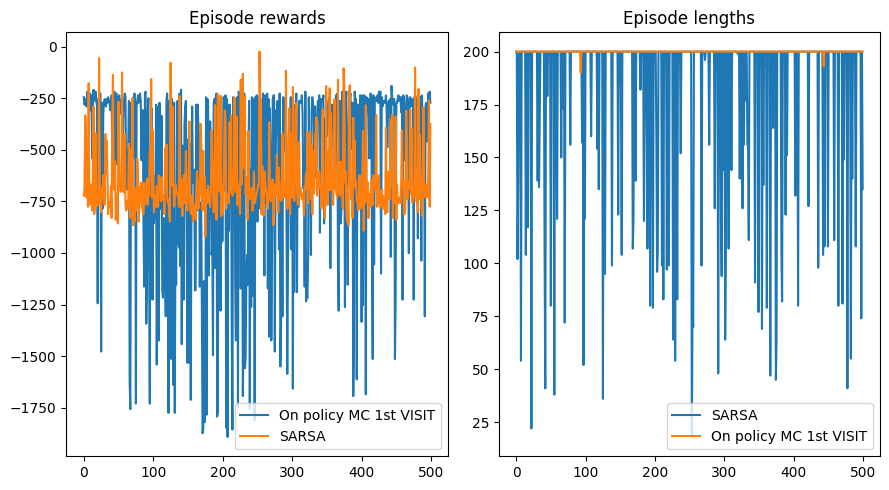

In [93]:
fig, axs = plt.subplots(ncols=2, figsize=(9, 5))
axs[0].set_title("Episode rewards")
axs[0].plot(range(len(mc_rewards)), mc_rewards, label='On policy MC 1st VISIT')
axs[0].plot(range(len(sarsa_rewards)), sarsa_rewards,label='SARSA')
axs[0].legend()
axs[1].set_title("Episode lengths")
axs[1].plot(range(len(sarsa_count)), sarsa_count,label='SARSA')
axs[1].plot(range(len(mc_ep_length)), mc_ep_length, label='On policy MC 1st VISIT')
axs[1].legend()
plt.tight_layout()
plt.show()